In [100]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Load Dataset
data = pd.read_csv('Titanic-Dataset.csv')


In [102]:
#check data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
#missing value checking
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [105]:
#cabin column contain huge amount of missing value so i drop it.
data.drop('Cabin',axis=1,inplace=True)

In [106]:
#drop unwanted cloumn
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore')


In [107]:
#in age cloumn fill value through median
data['Age'].fillna(data['Age'].median() , inplace=True)

/tmp/ipython-input-726442422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median() , inplace=True)


In [108]:
# Frequency  count for fill values in Embarked cloumn
data['Embarked'].mode()



,Embarked
0,S


In [109]:
#in the above 's' values frequency is high so fill 's' value
data['Embarked'].fillna(data['Embarked'].mode()[0])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [110]:
# Check again missing values
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [111]:
# Confirm missing values
print(data['Embarked'].isnull().sum())


2


In [112]:
data['Embarked'] = data['Embarked'].replace(' ', np.nan)


In [113]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [114]:
#again check missing value
data.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [115]:
# Convert categorical to numeric
data['Sex'] = data['Sex'].str.strip().map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})

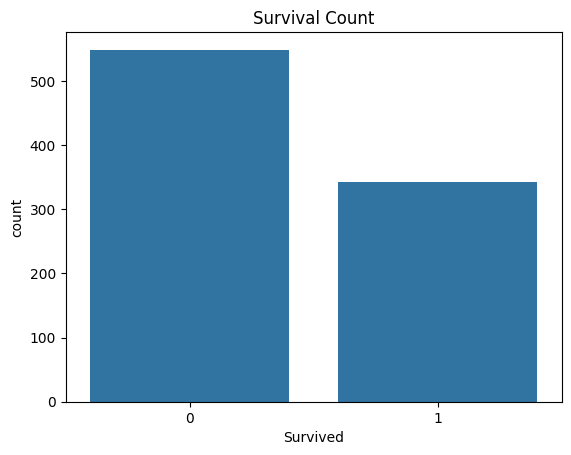

In [116]:
# This plot shows the distribution of passengers who survived and did not survive in the dataset.
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()


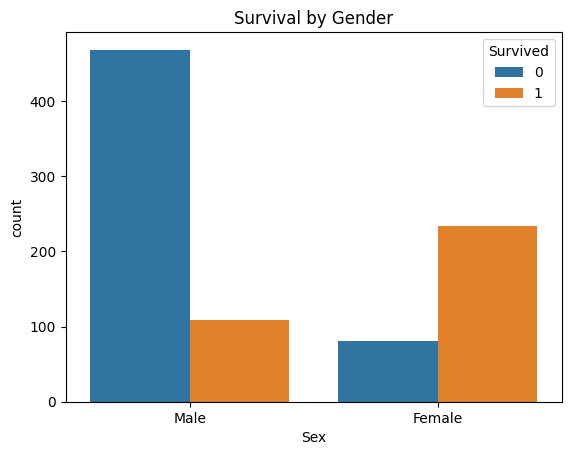

In [117]:
# This plot shows the relationship between passenger gender and survival status.
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival by Gender")
plt.xticks([0,1], ['Male','Female'])
plt.show()


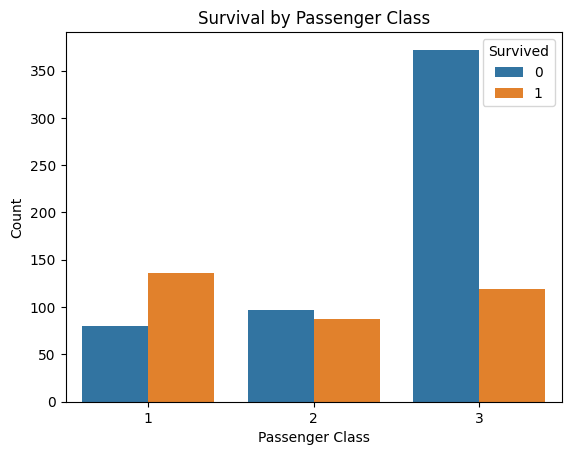

In [118]:
# This plot shows the relationship between passenger class and survival status.
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


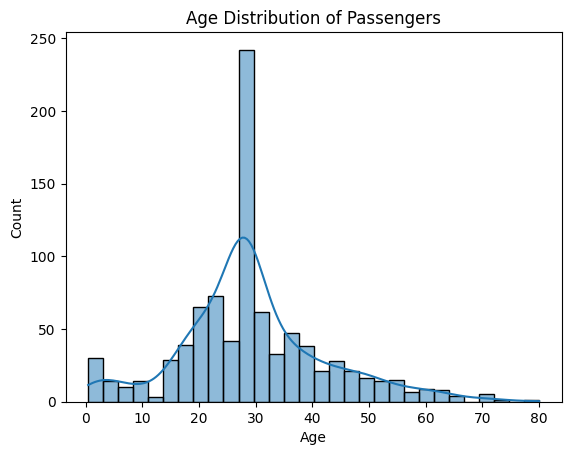

In [119]:
# This histogram shows the distribution of passenger ages in the dataset.
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [120]:
# The dataset is split into training and testing sets to evaluate model performance.
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (712, 7)
Testing set shape: (179, 7)


In [122]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


In [123]:
# Logistic Regression model is trained to predict passenger survival.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

# Prediction on test data
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458

Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



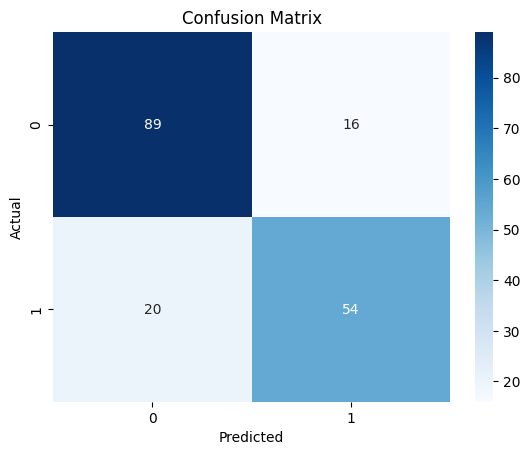

In [124]:
#model performance visualization
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


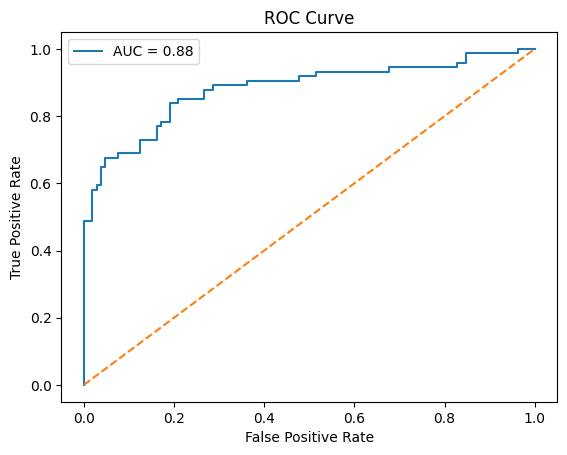

In [125]:
# ROC curve shows the trade-off between true positive rate and false positive rate.
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
